![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

### Equipo:

- Marcelo Rojas B.
- Sebastián Sanhueza O.


### Link de repositorio de GitHub: `https://github.com/Marcelorojasb/MDS7202`
---

## Reglas

- Fecha de entrega: 19/12/2023
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Se le recomienda levantar un ambiente de `conda` para instalar las librerías y así evitar cualquier problema con las versiones.


---

### 1. Introducción [0.5 puntos]

En este escenario, se enfrenta un problema de `clasificación binaria` que busca determinar si un cliente representa un riesgo crediticio para un préstamo bancario. Las clases identificadas como 0 y 1 denotan respectivamente la ausencia y presencia de riesgo financiero. Los datos disponibles incluyen información financiera detallada del cliente, abarcando aspectos como historial crediticio, ingresos, ocupación, comportamiento de pagos, etc.

El objetivo primordial del banquero Giturra es mejorar la calidad de los préstamos y reducir el riesgo de incumplimiento para salvaguardar la reputación del banco. Se busca identificar con precisión a aquellos clientes que representan un riesgo, es decir, aquellos que no serían aptos para un préstamo. Dado el desbalance entre las clases, se opta por el `F1-score` como métrica principal de evaluación de los modelos, enfocada en la clase que representa el riesgo crediticio (clase 1).Esta métrica ofrece una perspectiva equilibrada al considerar tanto la precisión como el recall en escenarios con clases desbalanceadas, lo que resulta crucial para la toma de decisiones en este contexto financiero

Finalmente, se utilizó el modelo `LightGBMClassifier`como modelo baseline, un modelo basado en el algoritmo de Gradient Boosting, que ha demostrado ser efectivo en conjuntos de datos grandes y desbalanceados, como el problema propuesto en este proyecto.

Se realizó un preprocesamiento de datos, para esto se aplicaron transformaciones para la preparación del conjunto de datos antes de su entrada al modelo. Se implementó la codificación One-Hot en las variables categóricas "occupation" y "payment_behaviour" para convertirlas en representaciones numéricas. También, se escalaron las variables numéricas usando RobustScaler para garantizar la resistencia del modelo a valores atípicos. Se abordo el manejo de los valores nulos y se usó un SimpleImputer con estrategia de imputación de la mediana, incorporando un indicador para identificar datos imputados. La salida se configuró como un DataFrame, facilitando la comprensión y el análisis de los datos transformados.

Al modelo utilizado, posteriormente se le realizó una optimización de hiperparámetros con lo cual se logró mejorar las métricas tanto globales como por clases (especificamente el f1 score que se selecciono como la metrica a minimizar debido a que es un problema desbalanceado).

Consideramos que los resultados de nuestro mejor modelo son aceptables, ya que, si bien las métricas no son perfectas, cumplen con los objetivos establecidos al inicio del proyecto.

---

### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]


In [ ]:
!pip install optuna
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import optuna
import joblib
import shap

from optuna.visualization import (
    plot_param_importances,
    plot_optimization_history,
    plot_parallel_coordinate
    )
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report,
    f1_score,
    )
from sklearn.preprocessing import (
    OneHotEncoder,
    RobustScaler
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay

Se llevará a cabo un breve análisis exploratorio de los datos para familiarizarse con las variables del conjunto de datos proporcionado. Este análisis implica examinar sus características, métricas y distribuciones, así como identificar posibles valores faltantes, outliers o patrones que puedan ser relevantes para resolver el problema en cuestión.

In [ ]:
# Carga de datos
df=pd.read_parquet("dataset.pq")

# Elimina la columna 'customer_id'
df.drop(columns=["customer_id"], inplace=True)

In [ ]:
# Visualiza el dataset
df.head(5)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,6.0,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,4.0,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,6.0,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,9.0,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,15.0,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


El conjunto de datos consta de 21 variables, algunas numéricas y otras categóricas. Estas métricas y clasificaciones representan información tanto del cliente como del préstamo, y se utilizan para clasificar la variable objetivo `credit_score`. Esta variable tiene dos valores únicos: 0 y 1. El valor 0 corresponde a la clasificación `Not Poor`, mientras que el valor 1 indica `Poor`. Estas categorías reflejan la solvencia del individuo, ayudando a las empresas a evaluar la capacidad de devolución del préstamo o crédito solicitado.

A continuación se presenta la descripción de cada una de las variables del dataset, las cuales se obtuvieron a partir del siguiente enlace: [Credit score classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).

- **age**: Representa la edad de la persona.

- **occupation**: Rpresenta la ocupación de la persona.

- **annual_income**: Representa los ingresos anuales de la persona.

- **monthly_inhand_salary**: Representa el salario base mensual de la persona.

- **num_bank_accounts**: Representa el número de cuentas bancarias que tiene la persona.

- **num_credit_card**: Representa el número de otras tarjetas de crédito que tiene la persona.

- **interest_rate**: Representa la tasa de interés de la tarjeta de crédito.

- **num_of_loan**: Representa el número de préstamos tomados del banco.

- **delay_from_due_date**: Representa el número medio de días de retraso desde la fecha de pago.

- **num_of_delayed_payment**: Representa el número medio de pagos retrasados por la persona.

- **changed_credit_limit**: Representa la variación procentual de del límite de la tarjeta de crédito.

- **num_credit_inquiries**: Representa el número de solicitudes de tarjeta de crédito.

- **outstanding_debt**: Representa la deuda pendiente de pago (en USD).

- **credit_utilization_ratio**: Representa el ratio de utilización de la tarjeta de crédito.

- **credit_history_age**: Representa la antigüedad del historial crediticio de la persona.

- **payment_of_min_amount**: Representa si la persona sólo ha pagado el importe mínimo.

- **total_emi_per_month**: Representa los pagos mensuales del EMI* (en USD).

- **amount_invested_monthly**: Representa la cantidad mensual invertida por el cliente (en USD).

- **payment_behaviour**: Representa el comportamiento de pago del cliente (en USD).

- **monthly_balance**: Representa el importe del saldo mensual del cliente (en USD).

- **credit_score**: Representa el tramo de puntuación crediticia.

*El EMI es la cantidad fija que pagas mensualmente para devolver un préstamo, incluyendo el dinero prestado más los intereses, y se mantiene igual cada mes.


Para profundizar en el análisis de los datos proporcionados, se empleará la información contenida en el archivo `profile.html`. Además, se llevará a cabo un análisis detallado de las distribuciones de los datos, buscando identificar comportamientos o patrones de interés significativo.

In [ ]:
# Analiza las métricas estadísticas de los datos
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


In [ ]:
# Visualiza la información de cada columna del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       12500 non-null  float64
 1   occupation                12500 non-null  object 
 2   annual_income             12500 non-null  float64
 3   monthly_inhand_salary     10584 non-null  float64
 4   num_bank_accounts         12500 non-null  int64  
 5   num_credit_card           12500 non-null  int64  
 6   interest_rate             12500 non-null  int64  
 7   num_of_loan               12500 non-null  float64
 8   delay_from_due_date       12500 non-null  int64  
 9   num_of_delayed_payment    11660 non-null  float64
 10  changed_credit_limit      12246 non-null  float64
 11  num_credit_inquiries      12243 non-null  float64
 12  outstanding_debt          12500 non-null  float64
 13  credit_utilization_ratio  12500 non-null  float64
 14  credit

In [ ]:
# Analiza la cantidad de datos nulos por columna
df.isna().sum()

age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64

<ipython-input-8-d79c49798620>:17: UserWarning: Problemas para generar histograma de monthly_balance
  warnings.warn(f"Problemas para generar histograma de {col}")


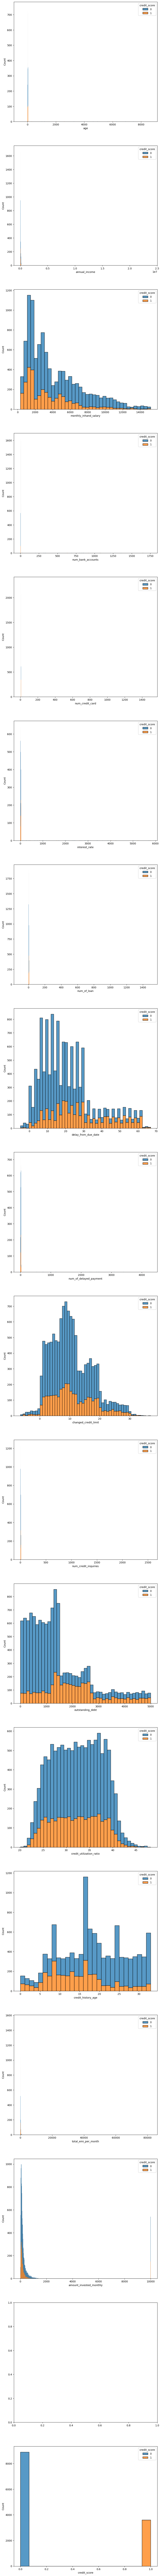

In [ ]:
# Columnas de tipo numérico
numericos = df.select_dtypes(include=["float64", "int64"])

# Grafica histograma de cada variable numérica con respecto a la variable objetivo 'credit_score'
fig, axes = plt.subplots(nrows=len(numericos.columns), figsize=(10, 10*len(numericos.columns)))
for col, ax in zip(numericos.columns, axes):
    # Pueden existir columnas que no se puedan graficar
    try:
        sns.histplot(
            data=numericos,
            x=col,
            hue="credit_score",
            multiple="stack",
            ax=ax
        )
    except ValueError:
        warnings.warn(f"Problemas para generar histograma de {col}")

Tras el análisis previo, se identificaron características importantes del conjunto de datos y sus variables. Entre los puntos destacables se encuentra la notable presencia de datos faltantes en ciertas variables clave como `monthly_inhand_salary` y `credit_history_age`, los cuales requerirán tratamiento para no afectar el rendimiento del modelo a construir. Los histogramas y la información del archivo proporcionado revelaron la existencia de outliers significativos en algunas variables. Por ejemplo, en `age` se observaron valores desde negativos hasta alrededor de 8000 años, mientras que `num_credit_card` tiene una media de 23.2 y un valor máximo de 1499. No obstante, muchos de estos casos de outliers podrían ser casos por imputación.

Tras observar los histogramas, se evidenció que ninguna variable muestra un patrón lo suficientemente distintivo para resolver directamente el problema. En otras palabras, no hay una variable que diferencie claramente las dos clases de la variable objetivo. Ambas clases cubren todos los rangos de valores en cada variable, y la diferencia principal radica en la frecuencia, lo cual se debe en gran medida al desequilibrio de clases presente en el conjunto de datos.





---

### 3. Preparación de Datos [0.5 puntos]


#### 3.1 Preprocesamiento con `ColumnTransformer`

Luego de un análisis detallado de los datos y su estructura, se detectaron variables con tipos de datos incorrectos. Específicamente, las columnas `occupation` y `payment_behaviour` se marcaban como objetos, aunque son variables categóricas. Se procedió a corregir el tipo de datos de estas variables, mientras que las demás se consideraron correctamente definidas en cuanto a su tipo de dato.

In [ ]:
# Cambia las columnas a tipo 'category'
object_cols=["occupation", "payment_behaviour"]

for i in object_cols:
    df[i]=df[i].astype('category')

Además de analizar los datos en conjunto, se examinaron minuciosamente las variables individualmente, detectando casos particulares que requerían tratamiento previo al uso del "ColumnTransformer". Específicamente, en las variables `occupation`, `payment_of_min_amount` y `payment_behaviour`, se hallaron valores inusuales como los strings `'_______'`, `'NM'` y `'!@9#%8'`, respectivamente, los cuales difieren significativamente de la mayoría de los datos en esas variables. Para evitar posibles interferencias en el rendimiento del modelo, se decidió convertir estos valores en nulos.


In [ ]:
# Visualización de los valores únicos en las variables categóricas
for i in df.select_dtypes(include=["category", "object"]).columns.tolist():
    print(f"\nConteo de valores únicos de '{i}':")
    print(f"\n{df[i].value_counts()}")


Conteo de valores únicos de 'occupation':

_______          880
Lawyer           828
Architect        795
Engineer         793
Accountant       791
Scientist        789
Teacher          782
Developer        780
Mechanic         780
Media_Manager    780
Entrepreneur     776
Journalist       761
Doctor           760
Musician         741
Manager          736
Writer           728
Name: occupation, dtype: int64

Conteo de valores únicos de 'payment_of_min_amount':

Yes    6571
No     4491
NM     1438
Name: payment_of_min_amount, dtype: int64

Conteo de valores únicos de 'payment_behaviour':

Low_spent_Small_value_payments      3202
High_spent_Medium_value_payments    2242
Low_spent_Medium_value_payments     1686
High_spent_Large_value_payments     1683
High_spent_Small_value_payments     1389
Low_spent_Large_value_payments      1300
!@9#%8                               998
Name: payment_behaviour, dtype: int64


In [ ]:
# Se transforman los valores de la variable 'payment_of_min_amount'
df["payment_of_min_amount"].replace("NM", np.nan, inplace=True)
df["payment_of_min_amount"].replace("Yes", "1", inplace=True)
df["payment_of_min_amount"].replace("No", "0", inplace=True)
df["payment_of_min_amount"]=df["payment_of_min_amount"].astype(float)

# Se reemplazan los valores inusuales de las variables categóricas
df["occupation"].replace("_______", np.nan, inplace=True)
df["payment_behaviour"].replace("!@9#%8", np.nan, inplace=True)

Además de las modificaciones previas, las variables categóricas no exhiben ningún orden jerárquico entre sus categorías, por lo que se optó por codificarlas utilizando un `OneHotEncoder`. Además, dado que algunas de las variables restantes muestran outliers bastante grandes, se decidió aplicar un `RobustScaler` para su escalamiento, otros escaladores como `StandardScaler` son bastante sensibles a estos valores atípicos.

In [ ]:
# Separamos la variable objetivo de las demás variables
X, y = df.drop(columns=["credit_score"]), df["credit_score"]

# Columnas de variables numéricas
num_cols=X.select_dtypes(include=["float", "int"]).columns

# Construcción del ColumnTransformer
transformer=ColumnTransformer(
    transformers=[
        (
            "cat_encoder",
            OneHotEncoder(drop="if_binary",
                          sparse_output=False,
                          handle_unknown="ignore",
                          dtype=int,
                         ),
            ["occupation", "payment_behaviour"]
        ),
        (
            "num_scaler",
            RobustScaler(),
            num_cols),
    ],
    remainder="passthrough",
)
# Configura la salida como un DataFrame
transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_encoder',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['occupation', 'payment_behaviour']),
                                ('num_scaler', RobustScaler(),
                                 Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'monthly_balance'],
      dtype='object'))])

In [ ]:
# Aplicamos la transformación sobre nuestros datos
X_transformed=transformer.fit_transform(X)
X_transformed.head(5)

,cat_encoder__occupation_Accountant,cat_encoder__occupation_Architect,cat_encoder__occupation_Developer,cat_encoder__occupation_Doctor,cat_encoder__occupation_Engineer,cat_encoder__occupation_Entrepreneur,cat_encoder__occupation_Journalist,cat_encoder__occupation_Lawyer,cat_encoder__occupation_Manager,cat_encoder__occupation_Mechanic,...,num_scaler__num_of_delayed_payment,num_scaler__changed_credit_limit,num_scaler__num_credit_inquiries,num_scaler__outstanding_debt,num_scaler__credit_utilization_ratio,num_scaler__credit_history_age,num_scaler__payment_of_min_amount,num_scaler__total_emi_per_month,num_scaler__amount_invested_monthly,num_scaler__monthly_balance
0,0,0,0,0,0,0,0,0,0,0,...,-0.888889,0.194357,-0.333333,-0.258118,-0.991589,NaN,-1.0,-0.168764,-0.581650,0.093085
1,0,0,0,0,0,0,0,0,0,0,...,-1.111111,-0.416928,-0.666667,-0.406645,0.060172,0.692308,-1.0,-0.391431,0.451297,0.082920
2,0,0,0,0,1,0,0,0,0,0,...,-0.888889,-0.241379,-0.500000,0.099178,0.696004,0.000000,-1.0,1.260369,52.498488,2.762925
3,0,0,0,0,0,1,0,0,0,0,...,-0.555556,-0.775340,-0.333333,-0.386766,-0.594409,-0.076923,-1.0,-0.408810,-0.045102,0.197878
4,0,0,1,0,0,0,0,0,0,0,...,0.111111,-0.713689,-0.333333,-0.161096,-0.766148,1.000000,0.0,-0.527644,0.251361,0.122278


Luego de aplicada la transformación sobre los datos se puede observar que estos se aplicaron correctamente.

#### 3.2 Holdout

Después de transformar los datos, se llevó a cabo la división en conjuntos de entrenamiento, validación y prueba que serán utilizados para entrenar y evaluar el modelo diseñado para abordar el problema. Se aplicaron proporciones estándar para generar estos conjuntos: 80% para entrenamiento, 20% para validación y 10% para prueba.

In [ ]:
# Porcentajes de la data asignados a cada conjunto
train_ratio = 0.80
val_ratio = 0.20
test_ratio = 0.10

# Genera el conjunto de test
X_remaining, X_test, y_remaining, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False, random_state=42)

# Genera los conjuntos de train y valdiation
X_train, X_val, y_train, y_val = train_test_split(X_remaining, y_remaining, test_size=val_ratio/(1 - test_ratio), shuffle=True, random_state=42)

print(f'Dimensiones y porcentajes: \nTrain:{X_train.shape}, {round((100*(X_train.shape[0]/X_transformed.shape[0])),1)}%\
      \nValidation:{X_val.shape}, {round((100*(X_val.shape[0]/X_transformed.shape[0])),1)}%\
      \nTest:{X_test.shape}, {round((100*(X_test.shape[0]/X_transformed.shape[0])),1)}%')

Dimensiones y porcentajes: 
Train:(8750, 20), 70.0%      
Validation:(2500, 20), 20.0%      
Test:(1250, 20), 10.0%


#### 3.3 Datos nulos.

En el análisis de los datos, se identificó una alta cantidad de valores nulos en diversas variables del conjunto de datos. Al revisarlos, se encontró que hay un total de 5422 registros con al menos un valor nulo, una cifra considerable considerando el tamaño del dataset. Eliminar cerca de 5000 registros podría afectar la capacidad del modelo para generalizar, ya que el conjunto de datos completo no es tan extenso. Se observó que la mayoría de estos valores nulos se encuentran en variables numéricas. Para abordar esto, se aplicará una imputación simple utilizando la mediana, con la adición de una columna Dummy. La elección de la mediana en lugar de la media se debe a la presencia de valores atípicos significativos en los datos.

In [ ]:
# Total de registros con al menos un valor nulo
X_transformed[X_transformed.isna().any(axis=1)].shape[0]

5422

In [ ]:
# Total de valores nulos presentes en cada variable
X_transformed.isna().sum().sort_values(ascending=False)

num_scaler__monthly_inhand_salary                                  1916
num_scaler__payment_of_min_amount                                  1438
num_scaler__credit_history_age                                     1120
num_scaler__num_of_delayed_payment                                  840
num_scaler__amount_invested_monthly                                 586
num_scaler__monthly_balance                                         355
num_scaler__num_credit_inquiries                                    257
num_scaler__changed_credit_limit                                    254
num_scaler__credit_utilization_ratio                                  0
num_scaler__outstanding_debt                                          0
cat_encoder__payment_behaviour_Low_spent_Small_value_payments         0
num_scaler__delay_from_due_date                                       0
num_scaler__num_of_loan                                               0
num_scaler__interest_rate                                       

#### 3.4 Feature Engineering [Bonus - 0.5 puntos]

En esta sección, se espera que apliquen su conocimiento y creatividad para identificar y construir características que brinden una mejor orientación a su modelo para identificar los casos deseados. Para motivar la construcción de nuevas características, se recomienda explorar las siguientes posibilidades:

- Generar ratios que relacionen variables categóricas con numéricas. Estos ratios permiten capturar relaciones proporcionales o comparativas entre diferentes categorías y valores numéricos.
- Combinación de rankings entre variables numéricas y categóricas.
- Discretización de variables numéricas a categóricas.
- Etc...

**Importantes**: Al explorar estas posibilidades no se limiten solo a estas propuestas, pueden aplicar otras técnicas de feature engineering pertinentes para mejorar la capacidad de su modelo para comprender y aprovechar los patrones presentes en los datos.

---

### 4. Baseline [1.5 puntos]


A continuación se probó la implementación de distintos modelos simples para resolver el problema dado. Los modelos a implementar fueron:

- `DummyClassifier`
- `LogisticRegression`.
- `KNeighborsClassifier`.
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier`
- `LightGBMClassifier`
- `XGBClassifier`

Se procedió a entrenar cada modelo tras procesar los datos de entrenamiento utilizando `ColumnTransformer` y `SimpleImputer`. Posteriormente, se evaluó el rendimiento de cada modelo utilizando el `classification_report`. No obstante, para la evaluación definitiva del desempeño del modelo, como se mencionó en la introducción, se dará prioridad a la métrica de `f1-score` de la clase positiva.


In [ ]:
# Columnas con valores nulos
null_cols=X_transformed.columns[X_transformed.isna().any()]

# Construcción del imputador de los valores nulos
imputer=ColumnTransformer(
    transformers=[
        (
            "imputer",
            SimpleImputer(
                strategy="median", # Se utiliza la mediana como estrategia de imputación
                add_indicator=True
            ),
            null_cols
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)
imputer.set_output(transform="pandas")
# Aplicación de la imputación
X_transformed_imputed = imputer.fit_transform(X_transformed)
X_transformed_imputed.head()

,num_scaler__monthly_inhand_salary,num_scaler__num_of_delayed_payment,num_scaler__changed_credit_limit,num_scaler__num_credit_inquiries,num_scaler__credit_history_age,num_scaler__payment_of_min_amount,num_scaler__amount_invested_monthly,num_scaler__monthly_balance,missingindicator_num_scaler__monthly_inhand_salary,missingindicator_num_scaler__num_of_delayed_payment,...,num_scaler__age,num_scaler__annual_income,num_scaler__num_bank_accounts,num_scaler__num_credit_card,num_scaler__interest_rate,num_scaler__num_of_loan,num_scaler__delay_from_due_date,num_scaler__outstanding_debt,num_scaler__credit_utilization_ratio,num_scaler__total_emi_per_month
0,-0.290586,-0.888889,0.194357,-0.333333,0.000000,-1.0,-0.581650,0.093085,0.0,0.0,...,-0.588235,-0.346719,-0.75,-0.333333,-0.916667,0.25,-0.833333,-0.258118,-0.991589,-0.168764
1,-0.011416,-1.111111,-0.416928,-0.666667,0.692308,-1.0,0.451297,0.082920,0.0,0.0,...,-0.294118,-0.051178,-1.00,-0.333333,-0.666667,-0.50,-0.833333,-0.406645,0.060172,-0.391431
2,2.094020,-0.888889,-0.241379,-0.500000,0.000000,-1.0,52.498488,2.762925,0.0,0.0,...,0.058824,1.983404,-1.25,0.000000,-0.500000,0.00,-0.555556,0.099178,0.696004,1.260369
3,-0.109332,-0.555556,-0.775340,-0.333333,-0.076923,-1.0,-0.045102,0.197878,0.0,0.0,...,1.294118,-0.129280,-1.00,0.000000,-0.833333,-25.75,-0.777778,-0.386766,-0.594409,-0.408810
4,-0.053914,0.111111,-0.713689,-0.333333,1.000000,0.0,0.251361,0.122278,0.0,0.0,...,-0.705882,-0.038031,0.25,0.000000,-0.750000,-25.75,-0.944444,-0.161096,-0.766148,-0.527644


In [ ]:
# Construcción del pipeline
transformer_with_imputer= Pipeline(
    steps=[
        ("transformer",transformer),
        ("imputer", imputer)]
)
transformer_with_imputer.set_output(transform="pandas")

# Construcción de clasificadores
# DummyClassifier
dummy_clf = DummyClassifier(
    strategy="stratified",
    random_state=42
)

# LogisticRegression
log_reg = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("LogisticRegression", LogisticRegression(
            random_state=42,
            class_weight="balanced",
            n_jobs=-2,
            solver="sag",
        )
        )
    ]
)

# KNeighborsClassifier
knn_clf = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("KNeighborsClassifier", KNeighborsClassifier(
            n_jobs=-2,
            algorithm="kd_tree",
        )
        )
    ]
)

# DecisionTreeClassifier
dt_clf = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("DecisionTreeClassifier", DecisionTreeClassifier(
            random_state=42,
            class_weight="balanced"
        )
        )
    ]
)


# SVC
svc = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("SVC", SVC(
            random_state=42,
            class_weight="balanced",
            probability=True
        )
        )
    ]
)


# RandomForestClassifier
rf_clf = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("RandomForestClassifier", RandomForestClassifier(
            random_state=42,
            n_jobs=-2,
            class_weight="balanced"
        )
        )
    ]
)

# LightGBMClassifier
lgbm_clf = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("LGBMClassifier",  lgb.LGBMClassifier(
            random_state=42,
            n_jobs=-2
        )
        )
    ]
)

# XGBClassifier
xgb_clf = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("XGBClassifier", xgb.XGBClassifier(
            random_state=42,
            enable_categorical=True,
            n_jobs=-2,
            tree_method="hist"
        )
        )
    ]
)

# Registro de los modelos en un diccionario
models = {
    "Dummy": dummy_clf,
    "LogisticRegression": log_reg,
    "KNeighborsClassifier": knn_clf,
    "DecisionTreeClassifier": dt_clf,
    "SVC": svc,
    "RandomForestClassifier": rf_clf,
    "LightGBMClassifier": lgbm_clf,
    "XGBClassifier": xgb_clf,
}

In [ ]:
f1_report = {}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, model in models.items():
        # Entrenamiento del modelo
        model.fit(X_train, y_train)
        # Predicción
        y_pred=model.predict(X_val)
        # Evaluación del modelo
        report=classification_report(y_val, y_pred)
        # Registro de la métrica f1-score
        f1_report[name]=f1_score(y_val, y_pred, average="binary", pos_label=1)
        print(f"{name} classification report:\n {report}")

Dummy classification report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1780
           1       0.27      0.27      0.27       720

    accuracy                           0.58      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.58      0.58      0.58      2500

LogisticRegression classification report:
               precision    recall  f1-score   support

           0       0.79      0.57      0.66      1780
           1       0.37      0.62      0.46       720

    accuracy                           0.58      2500
   macro avg       0.58      0.59      0.56      2500
weighted avg       0.67      0.58      0.60      2500

KNeighborsClassifier classification report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83      1780
           1       0.56      0.41      0.47       720

    accuracy                           0.74      2500
   macro a

In [ ]:
# Creación del DataFrame a partir del diccionario de la métrica de f1-score
f1_df=pd.DataFrame(list(f1_report.items()), columns=['Modelo', 'f1-score'])

# Ordenar el DataFrame a partir del f1-score
f1_df_sorted = f1_df.sort_values(by='f1-score', ascending=False)

print(f1_df_sorted)

                   Modelo  f1-score
6      LightGBMClassifier  0.595166
7           XGBClassifier  0.560061
5  RandomForestClassifier  0.558544
3  DecisionTreeClassifier  0.504178
2    KNeighborsClassifier  0.471440
1      LogisticRegression  0.461698
0                   Dummy  0.270119
4                     SVC  0.000000


- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?
   
   Todos los modelos entrenados obtuvieron un mejor desempeño que el modelo Dummy, excepto el modelo SCV. Este último tuvo un valor de F1-score igual a 0.0 para la clase 1, mientras que el modelo Dummy obtuvo un valor de 0.270119. Esto nos indica que la mayoría de los modelos tienen un mejor desempeño que el obtenido a partir de un modelo de clasificación aleatorio.

- ¿Cuál es el mejor clasificador entrenado?

  El mejor clasificador entrenado fue el `LightGBMClassifier`, logrando el puntaje más alto de F1-score para la clase 1, alcanzando un valor de 0.595166.

- ¿Por qué el mejor clasificador es mejor que los otros?

  El modelo `LightGBMClassifier` sobresale como el líder entre los modelos evaluados, posiblemente debido a las ventajas inherentes de los modelos basados en árboles que incorpora de manera efectiva. Estos modelos tienen la habilidad única de capturar relaciones complejas y no lineales entre características y etiquetas de manera no paramétrica, evitando la maldición de la dimensionalidad que afecta a otros modelos. Además, la superioridad del modelo puede deberse a su capacidad para manejar conjuntos de datos extensos y su eficiencia notable en términos de tiempo de entrenamiento. LightGBM emplea un algoritmo de boosting que optimiza la precisión del modelo y se adapta muy bien a una amplia gama de conjuntos de datos.

- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).
  
 El modelo LightGBM es conocido por su implementación eficiente en boosting, lo que haría que la búsqueda de hiperparámetros fuese bastante ágil. Por otro lado, el XGBClassifier, aunque competente, suele necesitar más tiempo de entrenamiento que el LightGBMClassifier, pero compensa con buenos resultados predictivos. A pesar de su mayor tiempo de entrenamiento, el XGBClassifier sigue siendo una opción sólida gracias a su buen rendimiento en la métrica de interés.

---

### 5. Optimización del Modelo [1.5 puntos]

Tras analizar los resultados previos, se determinó que los modelos mejor entrenados fueron el `LightGBMClassifier` y el `XGBClassifier`, basándose en sus puntuaciones de F1-score para la clase 1. A pesar de ser modelos sólidos, aún podrían mejorarse mediante una configuración más precisa de sus hiperparámetros.

En esta etapa, se llevará a cabo una optimización de los hiperparámetros para ambos modelos utilizando la librería `Optuna`. El objetivo es buscar configuraciones que mejoren el rendimiento de los modelos, comparado con sus resultados anteriores. Incluso, se pretende hallar una configuración que permita al modelo de XGBClassifier superar al modelo de LightGBM en términos de desempeño.





In [ ]:
def objective_xgb(trial):
  # Hiperparámetros del modelo Random Forest a optimizar
  params = {
            'objective': 'binary:logistic',
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1,),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "gamma": trial.suggest_float("gamma", 1e-8, 1.0),
            "n_estimators": trial.suggest_int("n_estimators", 10, 300),
        }

  # Contrucción del pipeline con el ColumnTransformer, SimpleImputer y XGBClassifier
  pipe_xgb = Pipeline(
      steps=[
          ("transformer_imputer", transformer_with_imputer),
          ("XGBClassifier", xgb.XGBClassifier(
              random_state=42,
              enable_categorical=True,
              n_jobs=-2,
              tree_method="hist",
              **params
              )
          )
          ]
      )

  # Entrena y evalua el modelo
  pipe_xgb.fit(X_train, y_train)
  y_pred = pipe_xgb.predict(X_val)
  # Se considera el weighted f1-score como métrica a maximizar
  return f1_score(y_val, y_pred, average="binary", pos_label=1)

In [ ]:
# Fija la semilla
seed = 42

# Ejecuta la optimización de hiperparámetros
study_xgb = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=seed))
study_xgb.optimize(objective_xgb, n_trials=100)

[I 2023-12-20 06:37:26,066] A new study created in memory with name: no-name-aeda303d-68f1-4a54-8bf6-2f04acf76950
[I 2023-12-20 06:37:26,385] Trial 0 finished with value: 0.5850654349499614 and parameters: {'max_depth': 7, 'learning_rate': 0.0951207163345817, 'subsample': 0.8659969709057025, 'colsample_bytree': 0.7993292420985183, 'min_child_weight': 2, 'gamma': 0.15599452877625744, 'n_estimators': 26}. Best is trial 0 with value: 0.5850654349499614.
[I 2023-12-20 06:37:27,119] Trial 1 finished with value: 0.5771916214119471 and parameters: {'max_depth': 14, 'learning_rate': 0.06051038616257767, 'subsample': 0.8540362888980227, 'colsample_bytree': 0.5102922471479012, 'min_child_weight': 10, 'gamma': 0.8324426424759953, 'n_estimators': 71}. Best is trial 0 with value: 0.5850654349499614.
[I 2023-12-20 06:37:30,162] Trial 2 finished with value: 0.5831399845320959 and parameters: {'max_depth': 5, 'learning_rate': 0.01915704647548995, 'subsample': 0.6521211214797689, 'colsample_bytree': 0.

In [ ]:
# Mejor valor de weighted f1-score
print(f"Mejor valor: {study_xgb.best_value}")

# Mejores parámetros encontrados
print("\nMejores parámetros:")
study_xgb.best_params

Mejor valor: 0.6021180030257186

Mejores parámetros:


{'max_depth': 9,
 'learning_rate': 0.028839757383571356,
 'subsample': 0.7764950106149382,
 'colsample_bytree': 0.7574913338613422,
 'min_child_weight': 3,
 'gamma': 0.06341400453103892,
 'n_estimators': 232}

In [ ]:
def objective_lgbm(trial):
  # Hiperparámetros del modelo LightGBMClassifier a optimizar
  params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

  # Contrucción del pipeline con el ColumnTransformer, SimpleImputer y LightGBMClassifier
  pipe_lgbm_clf = Pipeline(
      steps=[
          ("transformer_imputer", transformer_with_imputer),
          ("LGBMClassifier",  lgb.LGBMClassifier(
              random_state=42,
              n_jobs=-2,
              **params
              )
          )
          ]
      )

  # Entrena y evalua el modelo
  pipe_lgbm_clf.fit(X_train, y_train)
  y_pred = pipe_lgbm_clf.predict(X_val)
  return f1_score(y_val, y_pred, average="binary", pos_label=1)


In [ ]:
# Fija la semilla
seed = 42

# Ejecuta la optimización de hiperparámetros
study_lgbm = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=seed))
study_lgbm.optimize(objective_lgbm, n_trials=100)

[I 2023-12-20 06:40:58,147] A new study created in memory with name: no-name-9058ea18-8959-4a8e-9b5f-ff464e194f56
[I 2023-12-20 06:40:58,525] Trial 0 finished with value: 0.5592563903950426 and parameters: {'learning_rate': 0.19352465823520762, 'lambda_l1': 3.6010467344475403, 'lambda_l2': 0.038720902953704193, 'num_leaves': 68, 'feature_fraction': 0.4936111842654619, 'bagging_fraction': 0.49359671220172163, 'bagging_freq': 1, 'min_child_samples': 88}. Best is trial 0 with value: 0.5592563903950426.
[I 2023-12-20 06:40:59,445] Trial 1 finished with value: 0.5451807228915663 and parameters: {'learning_rate': 0.3045463557541723, 'lambda_l1': 0.023585940584142682, 'lambda_l2': 1.5320059381854043e-08, 'num_leaves': 98, 'feature_fraction': 0.899465584480253, 'bagging_fraction': 0.5274034664069657, 'bagging_freq': 2, 'min_child_samples': 22}. Best is trial 0 with value: 0.5592563903950426.
[I 2023-12-20 06:40:59,951] Trial 2 finished with value: 0.5684051398337113 and parameters: {'learning_

In [ ]:
# Mejor valor de weighted f1-score
print(f"Mejor valor: {study_lgbm.best_value}")

# Mejores parámetros encontrados
print("\nMejores parámetros:")
study_lgbm.best_params

Mejor valor: 0.6030075187969924

Mejores parámetros:


{'learning_rate': 0.03015934520263743,
 'lambda_l1': 1.7085135124354363e-08,
 'lambda_l2': 2.0556091673278655e-06,
 'num_leaves': 51,
 'feature_fraction': 0.9823814640995819,
 'bagging_fraction': 0.6814245024779264,
 'bagging_freq': 7,
 'min_child_samples': 22}

Después de llevar a cabo los procesos de optimización para ambos modelos, se registró una mejora en el rendimiento de cada uno. El `XGBClassifier` incrementó su métrica de F1-score para la clase 1, pasando de 0.560061 inicialmente a un valor de 0.60211 tras la optimización. Del mismo modo, el `LightGBMClassifier` elevó su F1-score para la clase 1 de 0.595166 a 0.603007 luego de la optimización.

A pesar de la estrecha diferencia, el `LightGBMClassifier` continúa manteniendo su posición como el modelo principal, conservando su liderazgo en términos de rendimiento. Es esencial tener en cuenta que la métrica para la clase 1 será consistentemente menor que para la clase 0, dado el marcado desequilibrio entre clases en los datos. Por ende, es natural que el F1-score en general para la clase 1 no sea muy alto.

Con el mejor modelo configurado con los mejores parámetros encontrados se procedió a evaluar su desempeño con el conjunto de prueba.

In [ ]:
# Mejores parámetros encontrados
best_params = study_lgbm.best_params
# Construcción del pipeline con los parámetros optimizados
best_lgbm_model = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("LGBMClassifier",  lgb.LGBMClassifier(
            random_state=42,
            n_jobs=-2,
            **best_params
        )
        )
    ]
)
best_lgbm_model.fit(X_train, y_train)
# Guarda el modelo optimizado y entrenado
joblib.dump(best_lgbm_model, 'Best_model_lgbm.pkl')

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9823814640995819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823814640995819
[LightGBM] [Warning] lambda_l2 is set=2.0556091673278655e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0556091673278655e-06
[LightGBM] [Warning] lambda_l1 is set=1.7085135124354363e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7085135124354363e-08
[LightGBM] [Warning] bagging_fraction is set=0.6814245024779264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6814245024779264
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9823814640995819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823814640995819
[LightGBM] [Warning] lambda_l2 is set=2.055609

['Best_model_lgbm.pkl']

In [ ]:
# Carga del modelo con parámetros optmizados
best_lgbm_model = joblib.load('Best_model_lgbm.pkl')

# Realiza la predicción y evaluación del modelo optimizado
y_pred = best_lgbm_model.predict(X_test)
print(f"\nLightGBMClassifier optimizado classification report:\
     \n{classification_report(y_test, y_pred)}")

weighted_f1_score = f1_score(y_test, y_pred, average="binary", pos_label=1)
print(f"\nWeighted f1-score con modelo optimizado: {weighted_f1_score}")

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9823814640995819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823814640995819
[LightGBM] [Warning] lambda_l2 is set=2.0556091673278655e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0556091673278655e-06
[LightGBM] [Warning] lambda_l1 is set=1.7085135124354363e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7085135124354363e-08
[LightGBM] [Warning] bagging_fraction is set=0.6814245024779264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6814245024779264

LightGBMClassifier optimizado classification report:     
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       879
           1       0.69      0.52      0.60       371

    accuracy                           0.79      1250
   macro avg       0.75      0.

Para resumir los resultados finales, el modelo `LightGBMClassifier` optimizado mostró un buen desempeño al evaluarse con el conjunto de prueba. Registró un F1-score para la clase 1 de 0.595092. Además de esta métrica destacada, vale la pena señalar que otras métricas como el  Precision y el Recall también mostraron mejoras significativas. En general, consideramos que el desempeño del modelo fue bastante sólido, especialmente considerando el breve proceso de preparación de los datos.

Se llevarán a cabo visualizaciones específicas proporcionadas por la librería `Optuna` para comprender más a fondo el entrenamiento del modelo `LightGBMClassifier` y su posterior optimización de hiperparámetros. Estas visualizaciones brindarán una perspectiva adicional, permitiéndonos observar y comprender aspectos de este proceso que no se revelan únicamente a través de las métricas estándar.

La primera visualización será el historial de optimización el cual presenta la trayectoria de la métrica objetivo (F1-score) a lo largo de las iteraciones durante la búsqueda de hiperparámetros. Muestra cómo el valor de la métrica cambia con cada ensayo realizado.

In [ ]:
# Grafico de historial de optimización
plot_optimization_history(study_lgbm)

En el contexto del modelo `LightGBMClassifier`, se evidencia que la métrica objetivo, específicamente el F1-score, converge rápidamente hacia su valor final durante el proceso de optimización. En la mayoría de las iteraciones, se observa una métrica mejorada en comparación con el modelo sin optimizar, lo que sugiere una mejora constante y rápida en el desempeño del modelo a medida que avanza la búsqueda de hiperparámetros.

La segunda visualización corresponde al de coordenadas paralelas el cual muestra cómo diferentes combinaciones de hiperparámetros afectan la métrica objetivo en trials individuales de optimización. Cada línea representa un punto en un espacio multidimensional, donde cada dimensión es un hiperparámetro y su valor para ese trial. Esto permite ver cómo cambian los hiperparámetros y cómo influyen en el desempeño del modelo.

In [ ]:
# Grafico de coordenadas paralelas
plot_parallel_coordinate(study_lgbm)

En particular para el caso de nuestro modelo optimizado se puede observar que en la mayoría de los trials se mantuvo con un valor objetivo bastante alto, entre 0.58 y 0.6. Por otra parte, se puede apreciar que en el hiperparámetro de `learning_rate` la mayoría de los trials más óptimos tienen un valor de este hiperparámetro bastante bajo, cercano a 0.01. Sin embargo, también se pueden apreciar hiperparámetros tales como `num_leaves` donde a lo largo de cada trial fue recorrido en casi todo su rango de valores. Esta variación sugiere una sensibilidad diferencial de los hiperparámetros en el rendimiento del modelo, donde algunos se mantienen estables mientras otros son más sensibles a la exploración de valores.

Finalmente, la tercera visualización corresponde al gráfico de importncias de hiperparámetros el cual muestra la importancia relativa de los hiperparámetros utilizados en la optimización. Esta visualización destaca cuáles hiperparámetros tuvieron mayor influencia en el rendimiento del modelo durante el proceso de búsqueda de hiperparámetros.

In [ ]:
# Grafico de importancia de hiperparámetros
plot_param_importances(study_lgbm)

En nuestro modelo optimizado, se destaca el hiperparámetro `learning_rate` como el más influyente en su rendimiento, con una notable diferencia respecto a los demás. Este parámetro exhibe una importancia de 0.74, mientras que el segundo más relevante apenas alcanza un valor de 0.1. Esta observación se alinea con lo evidenciado en el gráfico de coordenadas paralelas, donde los trials más óptimos se concentraron en valores bajos de este hiperparámetro, sin presentar mucha variación a lo largo de su rango de valores.

#### Bonus

1. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
2. **Imabalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/).
3. **Probar pycaret (AutoML)** [0.3 extras].


---

### 6. Interpretabilidad [1.0 puntos]

_En esta sección, se espera que los estudiantes demuestren su capacidad para explicar cómo sus modelos toman decisiones utilizando los datos. Dentro del análisis de interpretabilidad propuesto para el modelo, deberán ser capaces de:_

- Proponer un método para analizar la interpretabilidad del modelo. Es crucial que puedan justificar por qué el método propuesto es el más adecuado y explicar los alcances que podría tener en su aplicación.
- Identificar las características más relevantes del modelo. ¿La distribución de importancia es coherente y equitativa entre todas las variables?
- Analizar 10 observaciones aleatorias utilizando un método específico para verificar la coherencia de las interacciones entre las características.
- Explorar cómo se relacionan las variables utilizando algún descriptivo de interpretabilidad.
- ¿Existen variables irrelevantes en el problema modelado?, ¿Cuales son?.

Es fundamental que los estudiantes sean capaces de determinar si su modelo toma decisiones coherentes y evaluar el impacto que podría tener la aplicación de un modelo con esas variables en una población. ¿Es posible que el modelo sea perjudicial o que las estimaciones se basen en decisiones sesgadas?

En resumen, esta sección busca que los estudiantes apliquen un enfoque crítico para evaluar la interpretabilidad de su modelo, identificar posibles sesgos y analizar las implicaciones de sus decisiones en la población objetivo.

#### Método

Como método para analizar la interpretabilidad del modelo se utilizó principalmente SHAP. Esto pues SHAP proporciona una interpretación global y local de las predicciones del modelo. Esto permite entender cómo cada característica contribuye a una predicción específica y también obtener un resumen general de la importancia de cada característica en el conjunto de datos.

Sin embargo, para obtener la relación entre variables, se usó también Sklearn. Esto debido a que se tienen más opciones de visualización y se tiene una forma más general para observar las relaciones.

In [ ]:
# LightGBMClassifier
model = Pipeline(
    steps=[
        ("transformer_imputer", transformer_with_imputer),
        ("LGBMClassifier",  lgb.LGBMClassifier(
            random_state=42,
            n_jobs=-2,
            learning_rate=0.03015934520263743,
            lambda_l1=1.7085135124354363e-08,
            lambda_l2=2.0556091673278655e-06,
            num_leaves=51,
            feature_fraction=0.9823814640995819,
            bagging_fraction=0.6814245024779264,
            bagging_freq=7,
            min_child_samples=22
        ))
    ]
)

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('transformer_imputer', transformer_with_imputer)
    ],
    remainder='passthrough'
)

In [ ]:
model.fit(X_train, y_train)
# Predicción
y_pred=model.predict(X_val)
# Evaluación del modelo
report=classification_report(y_val, y_pred)
print(f"{'Best model LGB'} classification report:\n {report}")

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9823814640995819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823814640995819
[LightGBM] [Warning] lambda_l2 is set=2.0556091673278655e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0556091673278655e-06
[LightGBM] [Warning] lambda_l1 is set=1.7085135124354363e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7085135124354363e-08
[LightGBM] [Warning] bagging_fraction is set=0.6814245024779264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6814245024779264
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9823814640995819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823814640995819
[LightGBM] [Warning] lambda_l2 is set=2.055609

#### Características mas relevantes

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


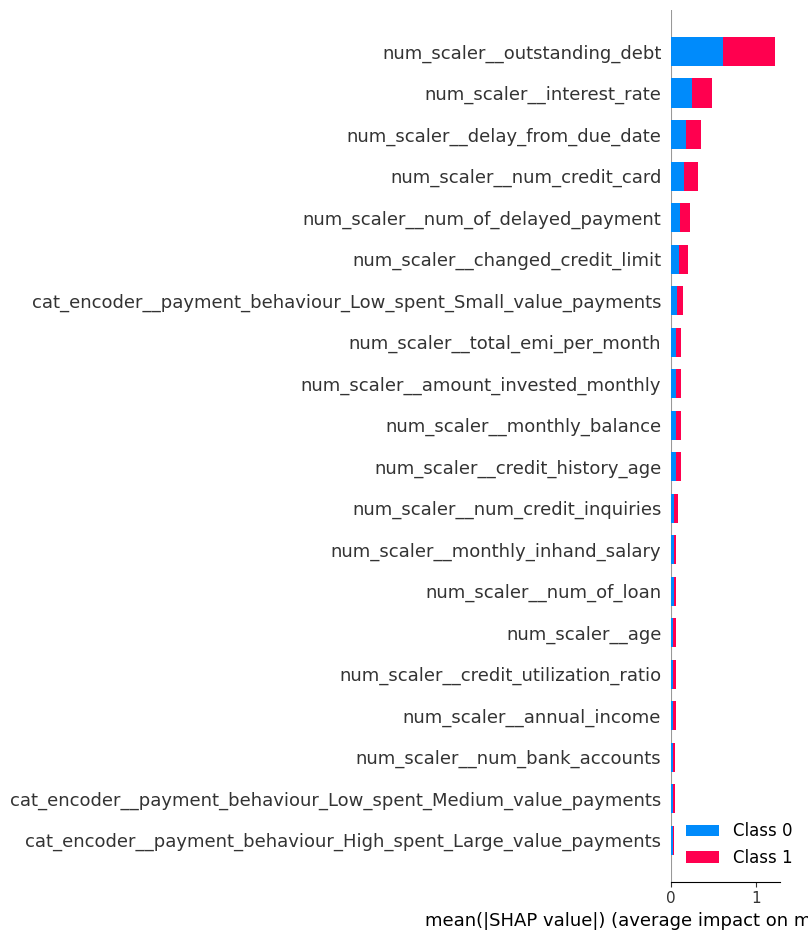

In [ ]:
# Calcula los valores SHAP
# Fit the transformer on X_train
transformer_with_imputer.fit(X_val)

# Transform X_train using the fitted transformer_with_imputer
X_val_transformed = transformer_with_imputer.transform(X_val)

explainer = shap.TreeExplainer(model.named_steps['LGBMClassifier'])
shap_values = explainer.shap_values(X_val_transformed)

# Resumen de valores SHAP
shap.summary_plot(shap_values, X_val_transformed, feature_names=X_val_transformed.columns)

In [ ]:
# Sum the SHAP values for the two outputs
shap_values_sum = np.sum(np.abs(np.array(shap_values)), axis=0)

# Calculate the mean absolute SHAP values across both outputs
shap_values_abs_mean = np.mean((shap_values_sum), axis=0)

# Get feature names sorted by importance
feature_importance_names = X_val_transformed.columns[np.argsort(shap_values_abs_mean)[::-1]]

importances = dict(zip(feature_importance_names, np.sort(shap_values_abs_mean)[::-1]))

In [ ]:
importances

{'num_scaler__outstanding_debt': 1.2246772387792397,
 'num_scaler__interest_rate': 0.485712993461696,
 'num_scaler__delay_from_due_date': 0.3520423537082446,
 'num_scaler__num_credit_card': 0.31754552864850477,
 'num_scaler__num_of_delayed_payment': 0.2185893282782115,
 'num_scaler__changed_credit_limit': 0.19993006322093387,
 'cat_encoder__payment_behaviour_Low_spent_Small_value_payments': 0.14752673046236436,
 'num_scaler__total_emi_per_month': 0.12177506135201031,
 'num_scaler__amount_invested_monthly': 0.12078416336080172,
 'num_scaler__monthly_balance': 0.11771601947914749,
 'num_scaler__credit_history_age': 0.11248058321166425,
 'num_scaler__num_credit_inquiries': 0.07934594986257482,
 'num_scaler__monthly_inhand_salary': 0.06221650155537213,
 'num_scaler__num_of_loan': 0.06084360800125089,
 'num_scaler__age': 0.056762476672325216,
 'num_scaler__credit_utilization_ratio': 0.05601402256217752,
 'num_scaler__annual_income': 0.0553021803235554,
 'num_scaler__num_bank_accounts': 0.05

Vemos que la importancia de las variables se distribuye equitativamente para las dos distintas clases (0 y 1). Es por esto que podemos realizar un análisis posterior sin considerar diferencia de clases.

Por otro lado, a nivel de las variables mismas, la importancia no se distrivuye equitativamente. Vemos que la variable 'num_scaler__outstanding_debt' posee notablemente una mayor importancia respecto a las otras. Podemos observar también que desde la variable 'num_scaler__num_credit_inquiries' la importancia de las variables es muy pequeña y casi irrelevante respecto a las con mayor importancia.

#### 10 observaciones aleatorias

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


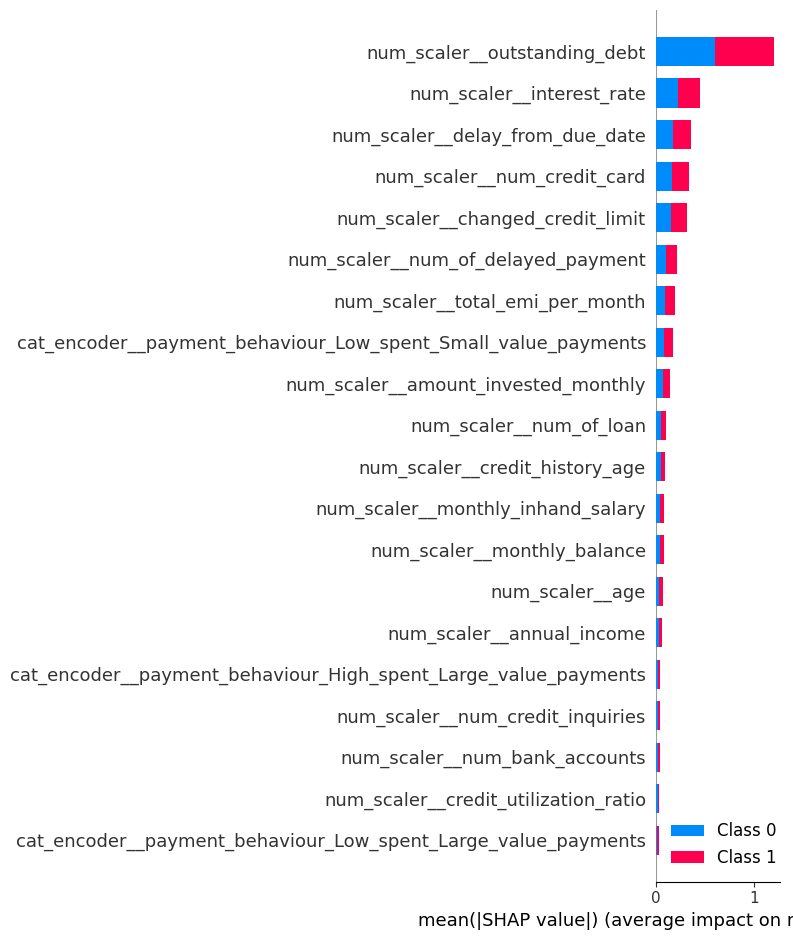

In [ ]:
# Seleccionar 10 observaciones aleatorias
random_indices = np.random.choice(len(X_val_transformed), 10, replace=False)
X_sample = X_val_transformed.iloc[random_indices]

# Crear un objeto explainer de SHAP
explainer = shap.TreeExplainer(model.named_steps['LGBMClassifier'])

# Calcular los valores SHAP para las observaciones seleccionadas
shap_values_sample = explainer.shap_values(X_sample)

# Resumen de valores SHAP para las observaciones seleccionadas
shap.summary_plot(shap_values_sample, X_sample, feature_names=feature_names)

Para esta muestra observamos que las variables más importantes para esta muestra aleatoria de 10 datos se mantienen. Podemos notar que las 4 variables más importantes son las mismas que las variables más importantes de toda la base de validación. Las siguientes variables más importantes cambian en su mayoria solo de lugar, pues se observan practicamente las mismas variables obtenidas para toda la base de validación.

#### Interacciones

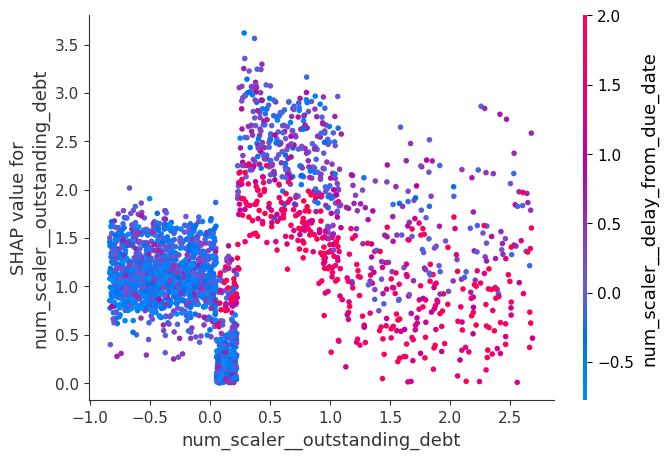

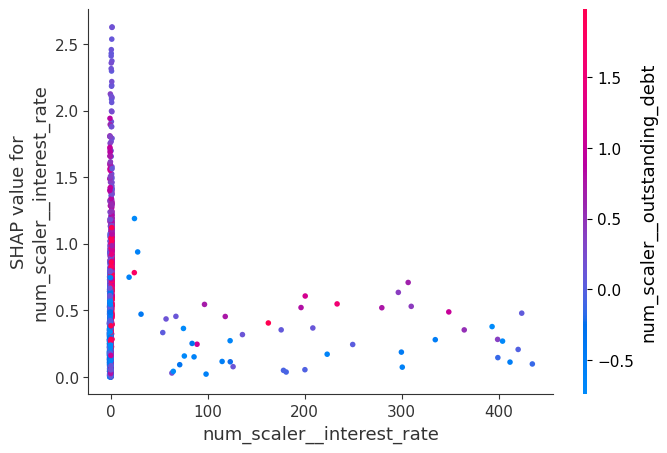

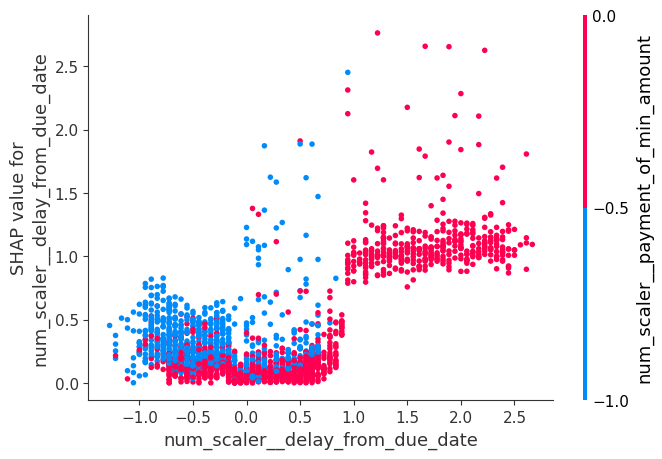

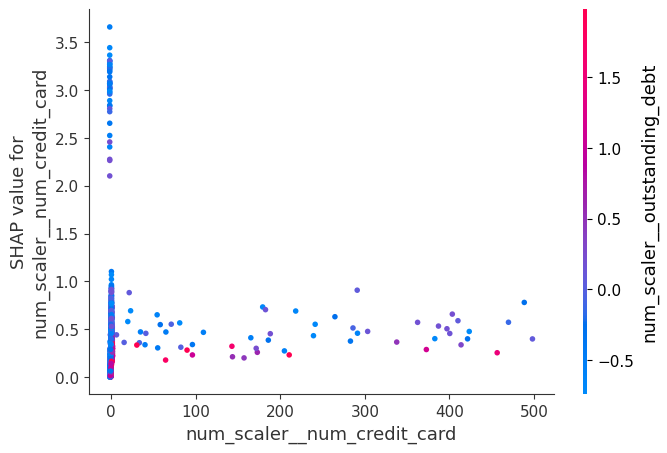

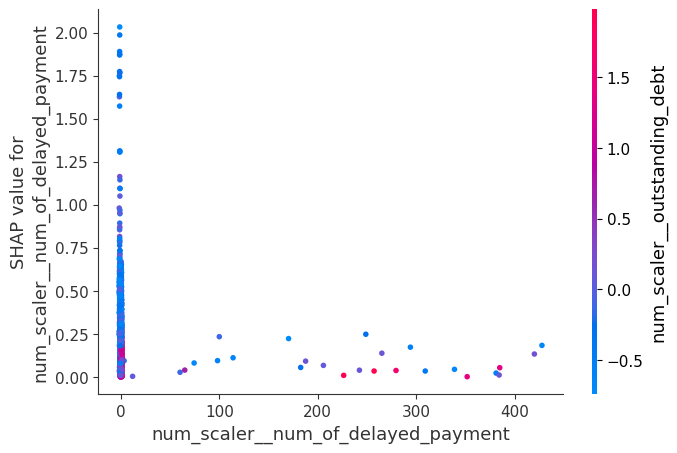

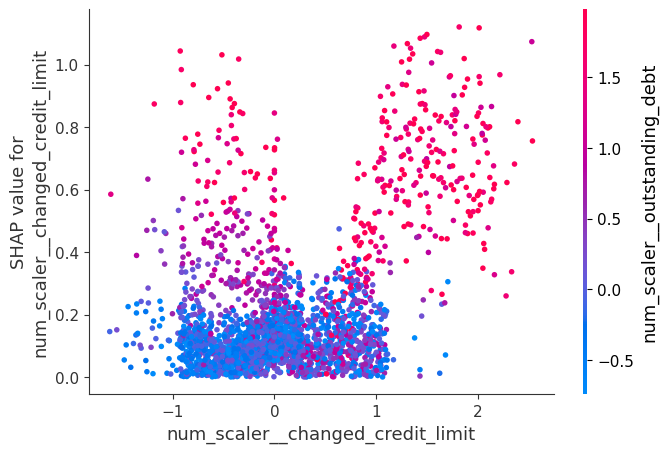

In [ ]:
for name in feature_importance_names[:6]:
    shap.dependence_plot(name, shap_values_sum, X_val_transformed)

Podemos observar dos gráficos interesantes. Para el gráfico de la variable 'num_scaler__changed_credit_limit' podemos ver que valores altos de 'num_scaler_outstanding_debt' se posees altos valores SHAP, lo que indica que la variable 'num_scaler_outstanding_debt' es más relevante para valores altos, por otro lado, también observamos una leve mayor importancia para valores altos de la variable 'num_scaler__changed_credit_limit' misma.

Para el gráfico de la variable 'num_scaler__delay_from_due_date' podemos ver que altos valores de 'num_scaler__delay_from_due_date' estan asociados con el valor cero para la variable 'num_scales_payment_of_min_amount' (altos días de retraso se asocian con no pago del valor más pequeño). Estos dos casos también se asocian con altos valores SHAP, esto pues, dichos valores parecen tener relación con alto riesgo financiero.

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9823814640995819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823814640995819
[LightGBM] [Warning] lambda_l2 is set=2.0556091673278655e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0556091673278655e-06
[LightGBM] [Warning] lambda_l1 is set=1.7085135124354363e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7085135124354363e-08
[LightGBM] [Warning] bagging_fraction is set=0.6814245024779264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6814245024779264
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9823814640995819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823814640995819
[LightGBM] [Warning] lambda_l2 is set=2.055609

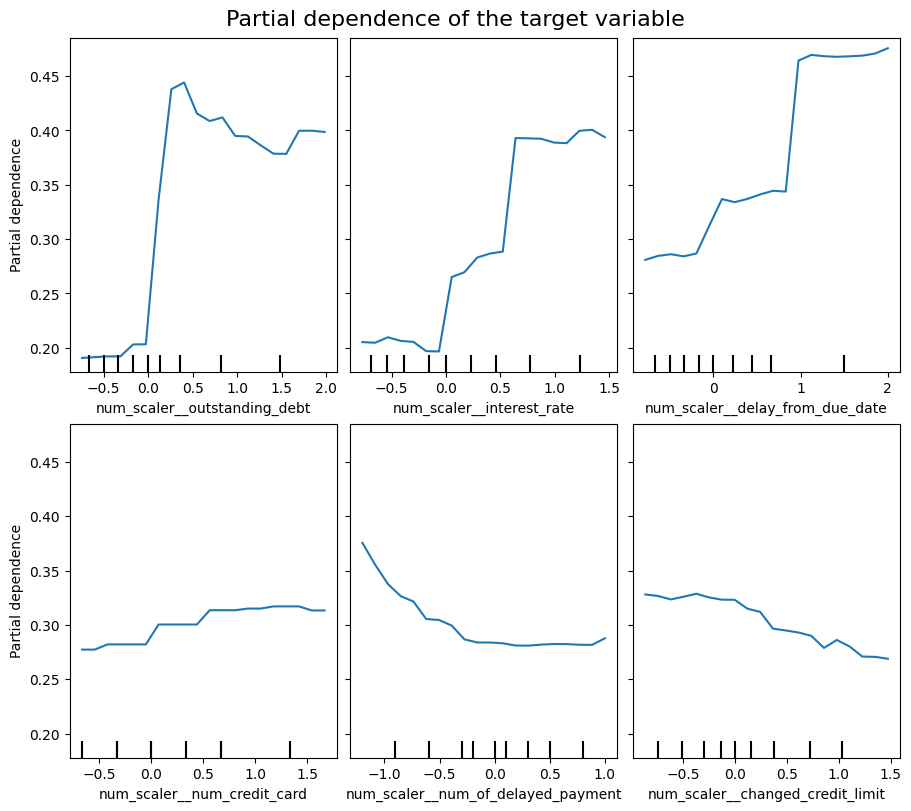

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'X_train' is your training data
# Assuming 'categorical_features' is a list of categorical feature names

# Selecting a subset of features for partial dependence plots
selected_features_for_pdp = [
    'num_scaler__outstanding_debt', 'num_scaler__interest_rate',
       'num_scaler__delay_from_due_date', 'num_scaler__num_credit_card',
       'num_scaler__num_of_delayed_payment',
       'num_scaler__changed_credit_limit',
]

# Assuming your LightGBM classifier model is stored in 'model'
_, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 8), constrained_layout=True)

# Creating PartialDependenceDisplay object
display = PartialDependenceDisplay.from_estimator(
    model.named_steps['LGBMClassifier'],  # Assuming "classifier" is the key for your LGBM model
    X_val_transformed,
    features=selected_features_for_pdp,
    kind="average",
    ax=ax,
    subsample=50,
    grid_resolution=20,
    random_state=0,
)

# Adding a title to the plot
_ = display.figure_.suptitle(
    "Partial dependence of the target variable",
    fontsize=16,
)

# Display the plot
plt.show()


Al observar las relaciones de las variables más importantes es posible observar que valores pequeños de la variable 'num_scaler__num_of_delayed_payment' (pocos pagos atrasados) posee una alta dependencia con el output, esto puede deberse a que pocos pagos atrasados puede asociarse con un poco riesgo financiero.

La misma observación puede hacerse para 'num_scaler__delay_from_due_date', altos dias de atraso pueden asociarse con alto riesgo financiero.

Para las primeras dos variables, la dependencia es relativamente alta para todos los valores positivos (para la segunda en mas bajo cerca de cero). Lo que indica que en casi todos los casos dicha variable posee alta dependencia con la salida, esto se coincide con el los valores de importancia obtenidos anteriormente.

#### Variables irrelevantes

Al ver las importancias ordenadas, es posible notar que solo hay una variable irrelevante, esta es, 'missingindicator_num_scaler__monthly_balance'.

Si no consideramos las columnas del tipo 'missingindicator' podemos ver que ninguna variable posee importancia cero, sin embargo, es posible observar que las variables de ocupación son menos relevantes que el resto de variables.

---

### 7. Concluir [1.0 puntos]




A modo de conclusión, se puede decir que se logró resolver eficazmente el problema de clasificación binaria propuesto, especificamente orientado en determinar el riesgo crediticio de los clientes para préstamos bancarios. Los resultados obtenidos son considerados aceptables, especialmente después de la fase de optimización del modelo LightGBM. Se comenzó con un Análisis Exploratorio de Datos (EDA) el cual fue útil para comprender la naturaleza de los datos y así desarrollar un modelo acorde a estos, se detectaron variables categoricas, numericas, valores nulos entre otras cosas Esto permitió la generación de un modelo de clasificación efectivo para el problema en cuestión.

Gracias a un análisis de diferentes modelos, se obtuvo un modelo "baseline" inicial implementado con LightGBM, cuyo rendimiento inicial resultó ser bastante aceptable, registrando un f1-score de 0.595. Como los hiperparámetros del modelo fueron los por "default", se realizó una fase de optimización, donde se ajustaron y optimizaron los hiperparámetros del modelo, posterior a esta fase de optimización se logró mejorar el rendimiento a un f1-score de 0.603, lo cual es un buen resultado, esto teniendo en consideración que existe un alto desbalance, se tiene| un accuracy global de 0.79 y que las transformaciones y modelo son relativamente simples computacionalmente.

A pesar de que los resultados obtenidos son aceptables, siempre hay margen para la mejora. Existen multiples técnicas, algoritmos, preprocesamientos, etc. que podrían generar un entendimiento más profundo, preciso y eficiente del problema en cuestión. Entre las posibles áreas de exploración se incluyen: Modelos profundos, selección de características, Manejo de Desbalance (data augmentation), entre otras.

Desde el punto de vista de los aprendizajes, el proyecto permitió la aplicación de técnicas de preprocesamiento, optimización y evaluación de modelos en este caso en un contexto financiero. Se lograron probar diferentes modelos permitiendo aprender el desepempeño que tienen estos en problemas como este (contexto financiero y con alto desbalance de clases). Se aplicaron además tecnicas de optimización de hiperparámetros y metodos de interpretabilidad, lo cual nos permitió practicar el análisis correspondiente de los resultados obtenidos.

En resumen, se lograron cumplir todos los objetivos propuestos del proyecto, logrando aplicar y aprender diferentes técnicas de modelamiento en el camino.


---

### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto:

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>